In [1]:
from tqdm import tqdm
import numpy as np
import pandas as pd
from IPython.display import display
import matplotlib.pyplot as plt
import matplotlib.image as image

import torch
import torch.nn as nn
import torch.nn.functional as F
from torchvision import datasets, transforms, models
from torch.utils.data import DataLoader, Dataset

import sys
sys.path.append('../../src/')
from build_model import resnet50
from dataset_functions import hdf5_dataset, list_to_dict, viz_dataloader

symmetry_classes = ['p1', 'p2', 'pm', 'pg', 'cm', 'pmm', 'pmg', 'pgg', 'cmm', 
                 'p4', 'p4m', 'p4g', 'p3', 'p3m1', 'p31m', 'p6', 'p6m']
label_converter = list_to_dict(symmetry_classes)

model = resnet50(3, 17)

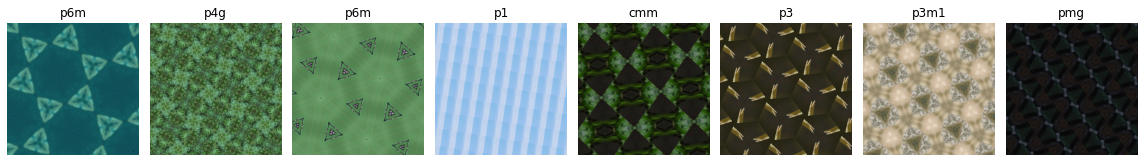

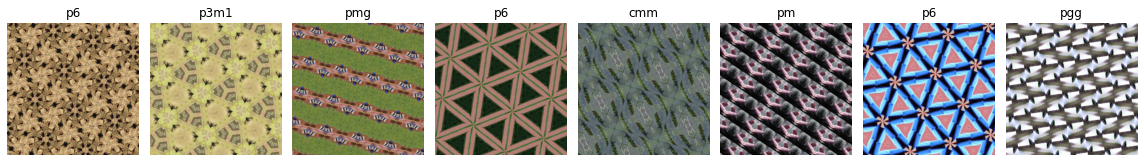

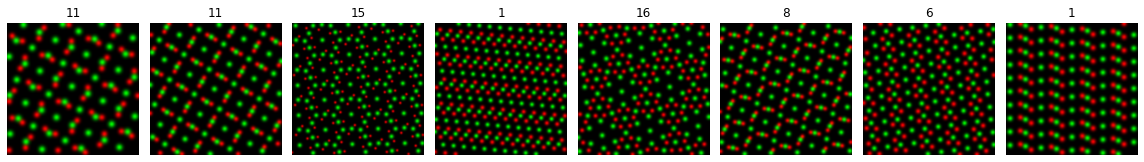

CPU times: user 28.9 s, sys: 1.07 s, total: 29.9 s
Wall time: 9.03 s


In [3]:
%%time
# imagenet
train_ds = hdf5_dataset('/scratch/yichen/imagenet_v4_rot_10m_train_unchunked.h5', folder='train', transform=transforms.ToTensor())
train_dl = DataLoader(train_ds, batch_size=230, shuffle=True, num_workers=2)
viz_dataloader(train_dl, label_converter=label_converter)

# train_ds = hdf5_dataset('/scratch/yichen/imagenet_v4_rot_2m_valid_unchunked.h5', folder='valid', transform=transforms.ToTensor())
# train_dl = DataLoader(train_ds, batch_size=230, shuffle=True, num_workers=2)
# viz_dataloader(train_dl, label_converter=label_converter)

valid_ds = hdf5_dataset('/scratch/yichen/imagenet_v4_rot_2m_valid_unchunked.h5', folder='valid', transform=transforms.ToTensor())
valid_dl = DataLoader(valid_ds, batch_size=230, shuffle=True, num_workers=2)
viz_dataloader(valid_dl, label_converter=label_converter)

test_ds = hdf5_dataset('/scratch/yichen/atom_v4_rot_2m_unchunked.h5', folder='test', transform=transforms.ToTensor())
test_dl = DataLoader(test_ds, batch_size=1024, shuffle=True, num_workers=4)
viz_dataloader(test_dl, label_converter=label_converter)

# analyze

In [4]:
model = torch.load('/scratch/yichen/models/05312023-benchmark-resnet50_from_scratch-v4_10m-epoch-19.pt')

In [7]:
sys.path.append('../src/')
from confusion_matrix_functions import confusion_matrix, plot_cm
NAME = 'benchmark-resnet50_from_scratch-v4_10m-05312023'
symmetry_classes = ['p1', 'p2', 'pm', 'pg', 'cm', 'pmm', 'pmg', 'pgg', 'cmm', 
                    'p4', 'p4m', 'p4g', 'p3', 'p3m1', 'p31m', 'p6', 'p6m']

In [9]:
device = torch.device('cuda:2')

cm = confusion_matrix(model, train_dl, symmetry_classes, device, n_batches='all')
np.save(NAME+'-train_cm.npy', cm)

100%|██████████| 43479/43479 [2:17:30<00:00,  5.27it/s]  


Sum for true labels:


,p1,p2,pm,pg,cm,pmm,pmg,pgg,cmm,p4,p4m,p4g,p3,p3m1,p31m,p6,p6m
0,588308.0,588239.0,588239.0,588233.0,588232.0,588231.0,588236.0,588232.0,588239.0,588237.0,588238.0,588239.0,588239.0,588224.0,588239.0,588238.0,588237.0


Accuracy for these batches: 0.9996354029167767


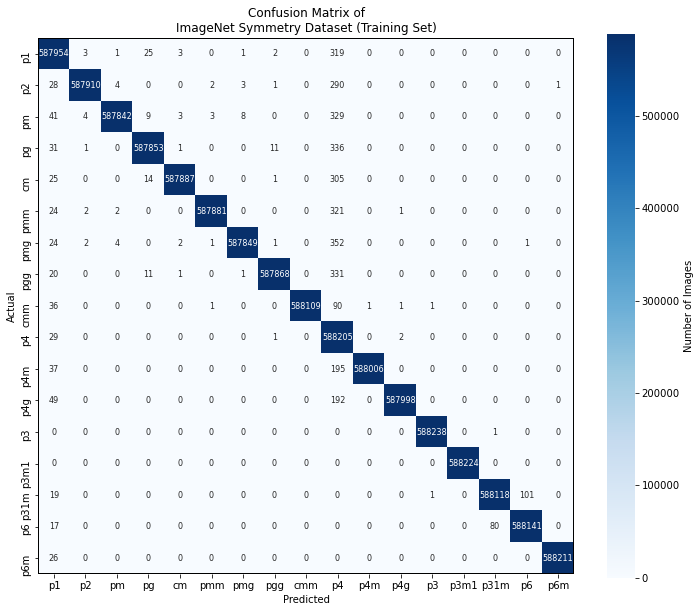

In [17]:
cm = np.load(NAME+'-train_cm.npy')

plot_cm(cm, symmetry_classes, save_file=NAME+'-train_cm.svg', title='\nImageNet Symmetry Dataset (Training Set)', style='with_axis')
# plot_cm(cm, symmetry_classes, save_file=None, style='with_axis')

In [11]:
cm = confusion_matrix(model, valid_dl, symmetry_classes, device, n_batches='all')
np.save(NAME+'-valid_cm.npy', cm)

100%|██████████| 8696/8696 [27:55<00:00,  5.19it/s]

Sum for true labels:


,p1,p2,pm,pg,cm,pmm,pmg,pgg,cmm,p4,p4m,p4g,p3,p3m1,p31m,p6,p6m
0,117670.0,117647.0,117647.0,117647.0,117646.0,117646.0,117648.0,117647.0,117647.0,117646.0,117647.0,117648.0,117647.0,117645.0,117645.0,117646.0,117647.0


Accuracy for these batches: 0.9991540067679459


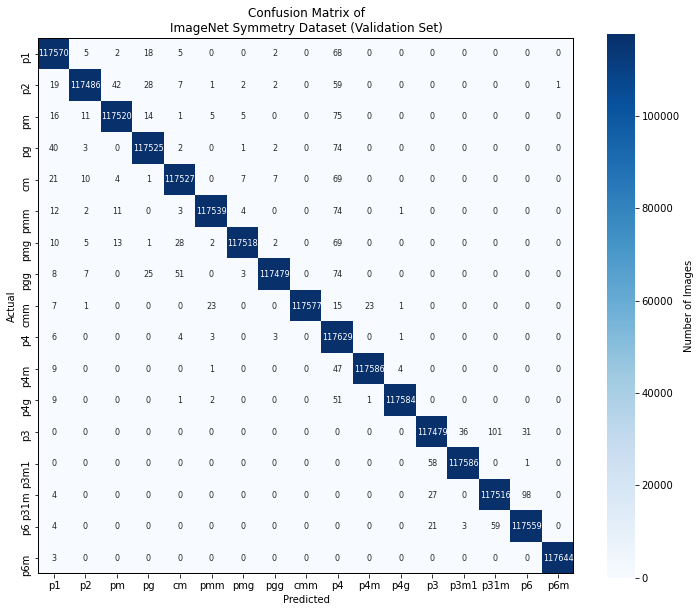

In [18]:
cm = np.load(NAME+'-valid_cm.npy')

plot_cm(cm, symmetry_classes, save_file=NAME+'-valid_cm.svg', title='\nImageNet Symmetry Dataset (Validation Set)', style='with_axis')
# plot_cm(cm, symmetry_classes, save_file=None, style='with_axis')

In [13]:
cm = confusion_matrix(model, test_dl, symmetry_classes, device, n_batches='all')
np.save(NAME+'-test_cm.npy', cm)

100%|██████████| 1985/1985 [29:26<00:00,  1.12it/s]


Sum for true labels:


,p1,p2,pm,pg,cm,pmm,pmg,pgg,cmm,p4,p4m,p4g,p3,p3m1,p31m,p6,p6m
0,270351.0,110143.0,110143.0,110143.0,110143.0,110143.0,110143.0,110143.0,110143.0,110143.0,110143.0,110143.0,110143.0,110143.0,110143.0,110143.0,110143.0


Accuracy for these batches: 0.5805782531969523


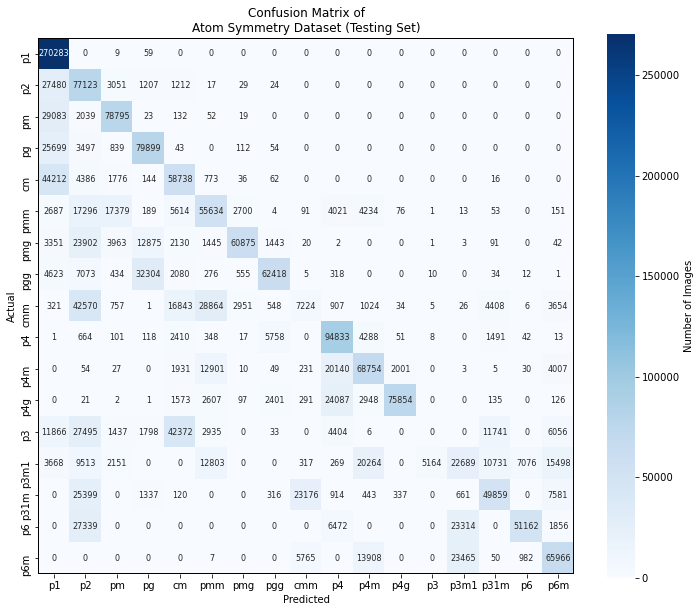

In [19]:
cm = np.load(NAME+'-test_cm.npy')

plot_cm(cm, symmetry_classes, save_file=NAME+'-test_cm.svg', title='\nAtom Symmetry Dataset (Testing Set)', style='with_axis')
# plot_cm(cm, symmetry_classes, save_file=None, style='with_axis')